## PCA and other test on the computed Dataframe

In [1]:
import pandas as pd
import operator
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Good_Book.csv")

In [3]:
new_df = df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Female_Male_Dialogues_Ratio"],
                axis = 1)

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 20 columns):
Genre1_Tag_Female         324 non-null float64
Genre1_Tag_Male           324 non-null float64
Genre2_Tag_Female         324 non-null float64
Genre2_Tag_Male           324 non-null float64
Genre3_Tag_Female         324 non-null float64
Genre3_Tag_Male           324 non-null float64
#_of_Female_Cast          324 non-null int64
#_of_Male_Cast            324 non-null int64
#_of_Female_Dialogue      324 non-null int64
#_of_Male_Dialogue        324 non-null int64
#_of_Female_Crew          324 non-null int64
#_of_Male_Crew            324 non-null int64
Sentiment_Female          324 non-null float64
Sentiment_Male            324 non-null float64
noun_count_male           324 non-null float64
noun_count_female         324 non-null float64
verb_count_male           324 non-null float64
verb_count_female         324 non-null float64
adjective_count_male      324 non-null float64
adjective_coun

### PCA for dimensionality reduction

In [5]:
pca = PCA(n_components = 3, random_state = 42)

In [6]:
principalComponents = pca.fit_transform(new_df)

In [7]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 'PC2', 'PC3'])

In [10]:
pca.explained_variance_ratio_ ## The amount of variance explained by each of the selected components.

array([0.6593168 , 0.323233  , 0.01674345])

In [11]:
pca.components_

array([[-3.22798185e-05, -3.31850519e-05, -1.87189843e-05,
        -2.71742871e-05,  8.76860307e-06,  3.90910173e-06,
         2.77222617e-03,  1.44208532e-02,  1.46282827e-01,
         9.89077199e-01, -3.81539560e-03, -9.86319492e-03,
         4.90633159e-05,  4.50197588e-05,  2.06573498e-04,
         1.15683171e-04,  2.72904946e-04,  2.01637617e-05,
         6.03400872e-05,  3.84616809e-05],
       [ 2.94420479e-05,  1.35710224e-05, -1.84752004e-05,
        -3.15018050e-05, -4.56138517e-05, -5.39084924e-05,
         9.66136692e-03, -3.19896157e-03,  9.88627634e-01,
        -1.46532918e-01, -4.75476805e-03, -3.18566385e-02,
         7.36164872e-05,  1.04677770e-04,  1.08874153e-05,
         1.02354454e-03, -1.29096550e-04,  1.14851045e-03,
        -7.42908870e-05,  2.54253555e-04],
       [-5.49375686e-05, -1.58490330e-05,  9.93402139e-05,
         1.40330393e-04,  4.17188676e-04,  4.47294905e-04,
        -9.84995742e-03, -4.91707311e-03,  3.30332151e-02,
         5.88777191e-03,  3.1

In [12]:
val = pca.components_.mean(axis = 0)
cols = new_df.columns
weights = {}

for vals, col in zip(val, cols):
    weights[col] = vals

In [13]:
sorted_d = sorted(weights.items(), key=operator.itemgetter(1))
sorted_d

[('noun_count_male', -0.0004924158735068236),
 ('verb_count_male', -0.00048206175559903185),
 ('adjective_count_male', -0.00021322323807656908),
 ('verb_count_female', -0.00020793165732415817),
 ('adjective_count_female', -0.0001238828087761419),
 ('noun_count_female', -0.00012357735394129865),
 ('Sentiment_Female', -6.761481686476834e-05),
 ('Genre1_Tag_Female', -1.9258446393614585e-05),
 ('Sentiment_Male', -1.8909735290283075e-05),
 ('Genre1_Tag_Male', -1.1821020817054639e-05),
 ('Genre2_Tag_Female', 2.0715343061161568e-05),
 ('Genre2_Tag_Male', 2.7218100423703227e-05),
 ('Genre3_Tag_Female', 0.0001267811424791902),
 ('Genre3_Tag_Male', 0.00013243183818837314),
 ('#_of_Female_Cast', 0.0008612118912130906),
 ('#_of_Male_Cast', 0.0021016061758941753),
 ('#_of_Female_Crew', 0.10212919602164522),
 ('#_of_Male_Dialogue', 0.2828106842326955),
 ('#_of_Male_Crew', 0.3022407305155091),
 ('#_of_Female_Dialogue', 0.38931455858164427)]

In [14]:
female_df = new_df.drop(["#_of_Male_Crew", "#_of_Male_Cast", "#_of_Male_Dialogue", "Genre3_Tag_Male", 
                        "Genre2_Tag_Male", "Genre1_Tag_Male", "Sentiment_Male", "adjective_count_male",
                        "noun_count_male", "verb_count_male"], axis = 1)

In [15]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
Genre1_Tag_Female         324 non-null float64
Genre2_Tag_Female         324 non-null float64
Genre3_Tag_Female         324 non-null float64
#_of_Female_Cast          324 non-null int64
#_of_Female_Dialogue      324 non-null int64
#_of_Female_Crew          324 non-null int64
Sentiment_Female          324 non-null float64
noun_count_female         324 non-null float64
verb_count_female         324 non-null float64
adjective_count_female    324 non-null float64
dtypes: float64(7), int64(3)
memory usage: 25.4 KB


In [16]:
pcaf = PCA(n_components = 3, random_state = 42)

In [17]:
principalComponentsf = pcaf.fit_transform(female_df)

In [18]:
principalDff = pd.DataFrame(data = principalComponentsf, 
                           columns = ['PC1', 'PC2', 'PC3']) ## Loading vectors

In [37]:
principalDff

,PC1,PC2,PC3
0,142.341280,3.112327,-1.205576
1,-135.624510,-7.330759,-1.674382
2,-43.573115,-7.961755,2.452231
3,-112.682592,5.756945,-0.469048
4,-61.603655,-6.004139,0.624507
5,-65.755254,22.964476,1.411131
6,-68.577219,-5.124306,3.757403
7,-122.657193,0.713023,-0.612965
8,21.349855,-1.499879,-2.075327
9,7.366048,-2.601205,-0.977335


In [20]:
pcaf.explained_variance_ ## The amount of variance explained by each of the selected components.

array([1.57077115e+04, 9.15224412e+01, 4.81092085e+00])

In [21]:
var_ratios = pcaf.explained_variance_ratio_
su = var_ratios[:2].sum() * 100
print(su, "%")

(99.96269987464682, '%')


In [22]:
pcaf.components_

array([[ 1.89854200e-05, -2.32010982e-05, -4.09508977e-05,
         1.01481260e-02,  9.99933663e-01, -5.22690847e-03,
         8.50937161e-05,  1.02249600e-03,  1.11517204e-03,
         2.56371918e-04],
       [-1.52982610e-04,  3.29853113e-04,  1.36752928e-03,
        -2.54136870e-02,  5.49885166e-03,  9.99608530e-01,
        -9.43005695e-04, -6.20949185e-03, -7.75480234e-03,
        -2.25985402e-03],
       [ 6.24134854e-04,  1.28175123e-03,  5.45486081e-04,
         9.91979019e-01, -1.01177209e-02,  2.65263640e-02,
         1.27835918e-03,  8.28508494e-02,  8.79435201e-02,
         2.38604320e-02]])

In [23]:
val = pcaf.components_.mean(axis = 0)
cols = female_df.columns
weights = {}

for vals, col in zip(val, cols):
    weights[col] = vals

In [24]:
sorted_d = sorted(weights.items(), key=operator.itemgetter(1))
sorted_d

[('Sentiment_Female', 0.0001401490676467882),
 ('Genre1_Tag_Female', 0.00016337922149142447),
 ('Genre2_Tag_Female', 0.0005294677469825487),
 ('Genre3_Tag_Female', 0.0006240214892043734),
 ('adjective_count_female', 0.007285649953057549),
 ('noun_count_female', 0.02588795117976099),
 ('verb_count_female', 0.027101296618462663),
 ('#_of_Female_Cast', 0.3255711525652904),
 ('#_of_Female_Dialogue', 0.3317715978929496),
 ('#_of_Female_Crew', 0.340302661933211)]

In [25]:
print(val.sum())

1.0593773276680576


### Onto Clustering

In [27]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(principalDf)

In [28]:
kmeans.labels_

array([3, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3,
       0, 2, 1, 1, 1, 0, 1, 3, 0, 1, 1, 3, 1, 3, 0, 0, 1, 3, 0, 1, 3, 1,
       1, 1, 2, 1, 0, 0, 3, 2, 2, 2, 0, 3, 3, 0, 0, 1, 0, 3, 3, 2, 2, 1,
       1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 0, 0, 3, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 3, 0, 3, 3, 2, 3, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 2,
       3, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 3, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 3, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 3, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 3, 3, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 3, 1, 1, 3, 0, 1, 1, 2, 0, 3, 1, 0,
       1, 0, 0, 0, 3, 1, 0, 2, 1, 0, 1, 1, 0, 3, 0, 1, 3, 3, 0, 3, 1, 3,
       1, 2, 2, 0, 1, 1, 2, 2, 3, 1, 0, 0, 1, 1, 0,

In [29]:
y_kmeans = kmeans.predict(principalDf)

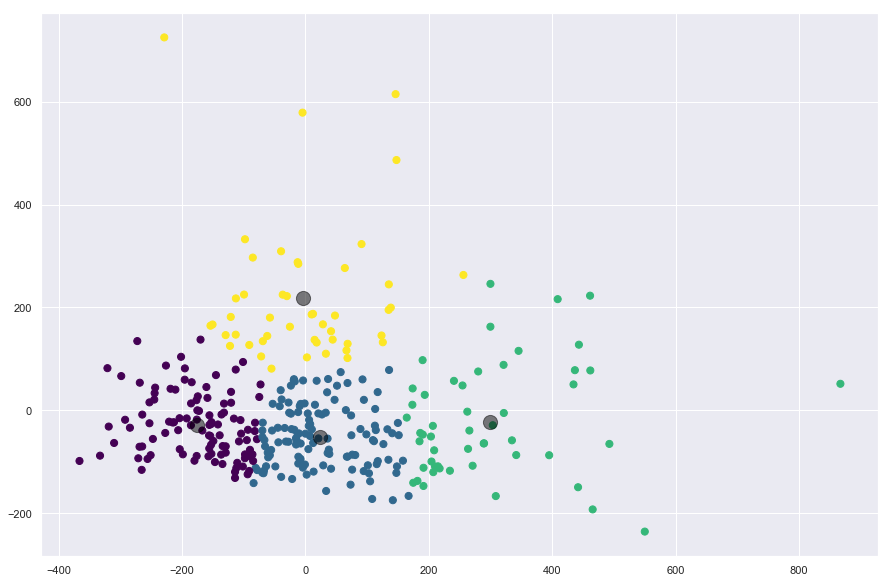

In [30]:
plt.figure(figsize = [15.0, 10.0])
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
plt.show()

In [31]:
## For only female chars
kmeansf = KMeans(n_clusters = 4, random_state = 42).fit(principalDff)

In [32]:
kmeansf.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 3, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 3, 0, 3, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 3, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0,

In [33]:
y_kmeansf = kmeansf.predict(principalDff)

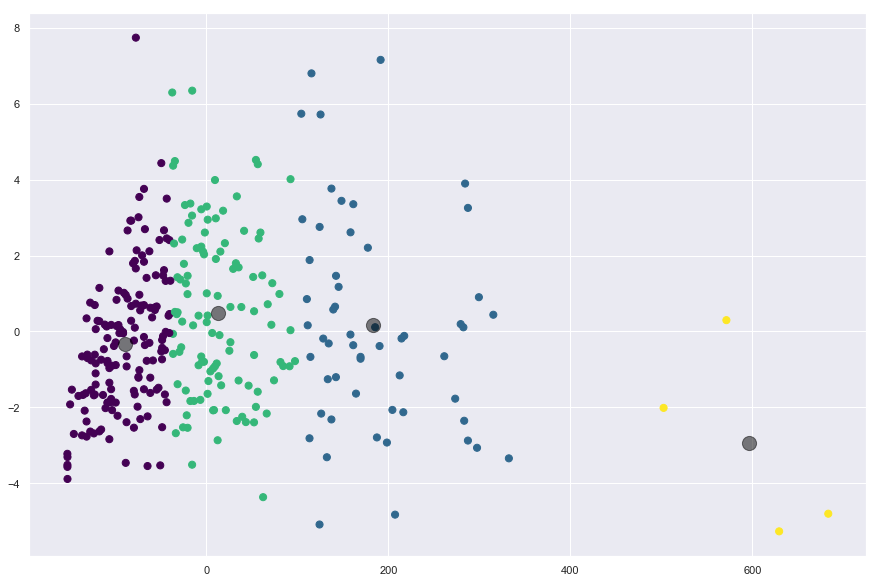

In [74]:
plt.figure(figsize = [15.0, 10.0])
plt.scatter(principalDff.iloc[:, 0], principalDff.iloc[:, 2], c = y_kmeansf, s = 50, cmap = 'viridis')
centers = kmeansf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c = 'black', s = 200, alpha = 0.5)
plt.show()

In [35]:
cl = pd.read_csv("New_Bechdel_Class_Labels.csv")

In [36]:
cl["All_param_cluster_label"] = kmeans.labels_

In [37]:
cl["Female_param_cluster_label"] = kmeansf.labels_

In [38]:
cl.to_csv("New_Bechdel_Class_Labels.csv", index = False)

## Normalising

In [35]:
# n_df = pd.read_csv("Normalised_New_Bechdel_Class_Labels.csv")

In [36]:
# n = n_df.drop(["Year", "New ROI", "Movie_Title", "Female_Male_Dialogues_Ratio", "IMDB_Rating", "Bechdel_Scores",
#               "labels", "All_param_cluster_label", "Female_param_cluster_label"],
#                 axis = 1)

In [37]:
# n.head()

In [38]:
# cols = n.columns

In [39]:
# for it in cols:
#     n["N_"+it] = (n[it] - n[it].min())/(n[it].max() - n[it].min())
#     n.drop([it], axis = 1, inplace = True)

In [40]:
# d = pd.DataFrame(data = n_df, columns = ["Year", "New ROI", "Movie_Title", "Female_Male_Dialogues_Ratio", 
#                                       "IMDB_Rating", "Bechdel_Scores", "labels", "All_param_cluster_label",
#                                       "Female_param_cluster_label"])

In [41]:
# n_df = pd.concat([n, d], axis = 1)

In [42]:
# n_df.to_csv("Normalised_New_Bechdel_Class_Labels.csv", index = False)

## PCA and Clustering on Normalised Features

In [43]:
n_df = pd.read_csv("Normalised_New_Bechdel_Class_Labels.csv")

In [44]:
df = n_df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Bechdel_Scores",
              "labels", "All_param_cluster_label", "Female_param_cluster_label"],
                axis = 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 20 columns):
N_Genre1_Tag_Female         324 non-null float64
N_Genre1_Tag_Male           324 non-null float64
N_Genre2_Tag_Female         324 non-null float64
N_Genre2_Tag_Male           324 non-null float64
N_Genre3_Tag_Female         324 non-null float64
N_Genre3_Tag_Male           324 non-null float64
N_#_of_Female_Cast          324 non-null float64
N_#_of_Male_Cast            324 non-null float64
N_#_of_Female_Dialogue      324 non-null float64
N_#_of_Male_Dialogue        324 non-null float64
N_#_of_Female_Crew          324 non-null float64
N_#_of_Male_Crew            324 non-null float64
N_Sentiment_Female          324 non-null float64
N_Sentiment_Male            324 non-null float64
N_noun_count_male           324 non-null float64
N_noun_count_female         324 non-null float64
N_verb_count_male           324 non-null float64
N_verb_count_female         324 non-null float64
N_adjective_c

In [46]:
female_df = df.drop(["N_#_of_Male_Crew", "N_#_of_Male_Cast", "N_#_of_Male_Dialogue", "N_Genre3_Tag_Male", 
                        "N_Genre2_Tag_Male", "N_Genre1_Tag_Male", "N_Sentiment_Male", "N_adjective_count_male",
                        "N_noun_count_male", "N_verb_count_male"], axis = 1)

In [47]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
N_Genre1_Tag_Female         324 non-null float64
N_Genre2_Tag_Female         324 non-null float64
N_Genre3_Tag_Female         324 non-null float64
N_#_of_Female_Cast          324 non-null float64
N_#_of_Female_Dialogue      324 non-null float64
N_#_of_Female_Crew          324 non-null float64
N_Sentiment_Female          324 non-null float64
N_noun_count_female         324 non-null float64
N_verb_count_female         324 non-null float64
N_adjective_count_female    324 non-null float64
dtypes: float64(10)
memory usage: 25.4 KB


In [48]:
pcaf = PCA(n_components = 3, random_state = 42)

In [49]:
principalComponentsf = pcaf.fit_transform(female_df)

In [50]:
principalDff = pd.DataFrame(data = principalComponentsf, 
                           columns = ['PC1', 'PC2', 'PC3'])

In [51]:
principalDff.head()

,PC1,PC2,PC3
0,-0.295529,-0.052132,0.082297
1,0.082149,0.054233,-0.347332
2,0.264626,-0.225641,-0.072794
3,0.041754,0.096580,0.142124
4,0.198120,-0.122346,-0.170241


In [52]:
pcaf.explained_variance_ratio_ ## The amount of variance explained by each of the selected components.

array([0.32957382, 0.18297113, 0.1143717 ])

In [53]:
pcaf.components_

array([[ 0.06422003,  0.36987552,  0.88786603, -0.07307202, -0.07766879,
         0.21446709, -0.05601128, -0.04476067, -0.07238809, -0.05488986],
       [-0.19735979, -0.20203668, -0.11824754, -0.55034585, -0.34054705,
         0.25596609, -0.13437792, -0.30174879, -0.50379487, -0.24281124],
       [-0.10751776, -0.24697803, -0.04989859,  0.10473583,  0.10383742,
         0.85140243, -0.21474753,  0.1833713 ,  0.27774172,  0.1463968 ]])

In [54]:
val = pcaf.components_.mean(axis = 0)
cols = female_df.columns
weights = {}

for vals, col in zip(val, cols):
    weights[col] = vals

In [55]:
sorted_d = sorted(weights.items(), key=operator.itemgetter(1))
sorted_d

[('N_#_of_Female_Cast', -0.17289401426094342),
 ('N_Sentiment_Female', -0.13504557423990113),
 ('N_#_of_Female_Dialogue', -0.10479280678955749),
 ('N_verb_count_female', -0.09948041270223745),
 ('N_Genre1_Tag_Female', -0.08021917630894627),
 ('N_noun_count_female', -0.054379388407471065),
 ('N_adjective_count_female', -0.050434763614638556),
 ('N_Genre2_Tag_Female', -0.026379727191434388),
 ('N_Genre3_Tag_Female', 0.23990663354972763),
 ('N_#_of_Female_Crew', 0.4406118686985924)]

In [56]:
## For only female chars
kmeansf = KMeans(n_clusters = 4, random_state = 42).fit(principalDff)

In [57]:
kmeansf.labels_

array([0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 0, 3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 3, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 3, 0, 0, 0, 0, 1, 2, 1, 3, 2, 0, 3,
       1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 3, 0, 0, 1, 2, 1,
       1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 3, 0, 1, 0, 2, 2, 1, 3, 1,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1,
       3, 0, 0, 2, 3, 0, 1, 0, 2, 1, 0, 0, 3, 0, 2, 0, 1, 3, 0, 0, 2, 0,
       3, 1, 0, 1, 0, 0, 2, 1, 3, 3, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 3, 0, 1, 0, 0, 0, 1,
       2, 3, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 0, 3, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [58]:
y_kmeansf = kmeansf.predict(principalDff)

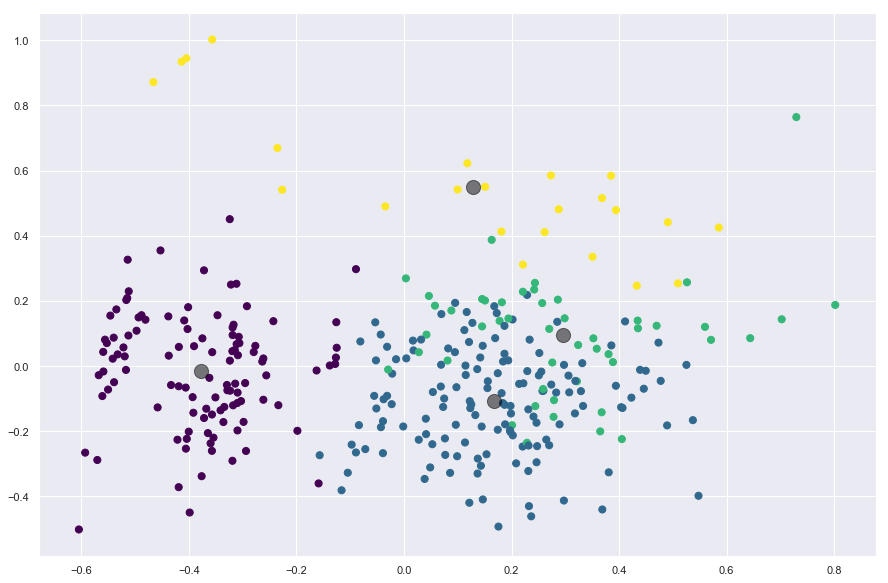

In [59]:
plt.figure(figsize = [15.0, 10.0])
plt.scatter(principalDff.iloc[:, 0], principalDff.iloc[:, 1], c = y_kmeansf, s = 50, cmap = 'viridis')
centers = kmeansf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
plt.show()

In [60]:
n_df["Female_param_cluster_label"] = kmeansf.labels_

In [61]:
n_df.to_csv("Normalised_New_Bechdel_Class_Labels.csv", index = False)

## Clustering without PCA

In [39]:
new_df = pd.read_csv("Good_Book.csv")
new_df = new_df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Female_Male_Dialogues_Ratio"],
                axis = 1)
female_df = new_df.drop(["#_of_Male_Crew", "#_of_Male_Cast", "#_of_Male_Dialogue", "Genre3_Tag_Male", 
                        "Genre2_Tag_Male", "Genre1_Tag_Male", "Sentiment_Male", "adjective_count_male",
                        "noun_count_male", "verb_count_male"], axis = 1)

In [52]:
## For only female chars
kmeansf = KMeans(n_clusters = 4, random_state = 42)
kmeansf.fit_transform(female_df)

array([[231.90356234,  41.01386458, 129.55418806, 454.28749871],
       [ 46.66680224, 318.99349696, 148.65231661, 732.28583481],
       [ 46.71149925, 227.01322641,  56.97987142, 640.27044596],
       ...,
       [ 64.56301257, 332.17321046, 163.06068925, 744.92828538],
       [  6.39739872, 274.95998378, 104.62400917, 688.26838179],
       [ 57.90744964, 214.92782948,  44.55219288, 628.27758144]])

In [53]:
y_kmeansf = kmeansf.predict(female_df)

In [59]:
kmeansf.score(female_df)

-573187.6256993541

In [55]:
kmeansf.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 3, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 3, 0, 3, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 3, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0,

In [56]:
n_df = pd.read_csv("New_Bechdel_Class_Labels.csv")

In [57]:
n_df["Direct_Cluster_FV"] = kmeansf.labels_

In [58]:
n_df.to_csv("New_Bechdel_Class_Labels.csv", index = False)

## Keyser's Test and Bartlett's Tests

In [40]:
## The Kaiser-Meyer-Olkin Measure of Sampling Adequacy is a statistic that indicates the proportion of variance in 
## your variables that might be caused by underlying factors.
## High values (close to 1.0) generally indicate that a factor analysis may be useful with your data. 
## If the value is less than 0.50, the results of the factor analysis probably won't be very useful.

In [4]:
new_df = pd.read_csv("Good_Book.csv")
new_df = new_df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Female_Male_Dialogues_Ratio"],
                axis = 1)
female_df = new_df.drop(["#_of_Male_Crew", "#_of_Male_Cast", "#_of_Male_Dialogue", "Genre3_Tag_Male", 
                        "Genre2_Tag_Male", "Genre1_Tag_Male", "Sentiment_Male", "adjective_count_male",
                        "noun_count_male", "verb_count_male"], axis = 1)

In [5]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
Genre1_Tag_Female         324 non-null float64
Genre2_Tag_Female         324 non-null float64
Genre3_Tag_Female         324 non-null float64
#_of_Female_Cast          324 non-null int64
#_of_Female_Dialogue      324 non-null int64
#_of_Female_Crew          324 non-null int64
Sentiment_Female          324 non-null float64
noun_count_female         324 non-null float64
verb_count_female         324 non-null float64
adjective_count_female    324 non-null float64
dtypes: float64(7), int64(3)
memory usage: 25.4 KB


In [90]:
def KMO(df):
    corr = df.corr().as_matrix() ## Correaltion matrix for the dataframe
    invcor = np.linalg.inv(corr) ## Inverse matrix
    d = np.linalg.inv(np.diag(np.sqrt(np.diag(invcor)))) ## Get the D 1/2 matrix
    antiimage = np.matmul(np.matmul(d, invcor), d) ## Get the anti-image matrix
    num = 0; den = 0

    ## Calculate the KMO using formula
    for rows in range(antiimage.shape[0]):
        for cols in range(antiimage.shape[1]):
            if rows != cols:
                num += (corr[rows][cols] ** 2)
                den += ((corr[rows][cols] ** 2) + (antiimage[rows][cols] ** 2))

    kmo = num / den
    return kmo

In [98]:
kmo = KMO(female_df)
print("Value of the KMO Test: ", kmo, ":: Rounded of value: ", round(kmo, 2))

Value of the KMO Test:  0.69836676830795 :: Rounded of value:  0.7


In [99]:
## Bartlett's test of sphericity tests the hypothesis that your correlation matrix is an identity matrix, 
## which would indicate that your variables are unrelated and therefore unsuitable for structure detection. 
## Small values (less than 0.05) of the significance level indicate that a factor analysis may be useful with your data.

In [100]:
from scipy.stats import bartlett

In [152]:
k, pval = bartlett(*female_df.as_matrix()[:, 0:10])
print("Test Statistic: ", k, ":: P-value: ", pval)

Test Statistic:  inf :: P-value:  0.0


## Varimax Rotation on dataframe

In [31]:
loadings = pcaf.components_.T * np.sqrt(pcaf.explained_variance_ratio_)
loadings = pd.DataFrame(loadings)

In [32]:
def varimax(loadings, normalize=True, max_iter=500, tolerance=1e-5):
        df = loadings.copy()
        column_names = df.index.values
        index_names = df.columns.values
        n_rows, n_cols = df.shape
        if n_cols < 2:
            return df
        X = df.values
        if normalize:
            normalized_mtx = df.apply(lambda x: np.sqrt(sum(x**2)),
                                      axis=1).values
            X = (X.T / normalized_mtx).T
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(max_iter):
            old_d = d
            basis = np.dot(X, rotation_mtx)
            transformed = np.dot(X.T, basis**3 - (1.0 / n_rows) *
                                 np.dot(basis, np.diag(np.diag(np.dot(basis.T, basis)))))
            U, S, V = np.linalg.svd(transformed)
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)
            if old_d != 0 and d / old_d < 1 + tolerance:
                break

        X = np.dot(X, rotation_mtx)

        if normalize:
            X = X.T * normalized_mtx
        else:
            X = X.T
        loadings = pd.DataFrame(X, columns=column_names, index=index_names).T

        return loadings, rotation_mtx

In [33]:
rotated_loading, rotationMtx = varimax(loadings)

In [34]:
rotated_loading.sum(axis = 0)

0    0.921994
1   -0.006298
2    0.405079
dtype: float64

In [35]:
loadings

,0,1,2
0,0.000019,-0.000012,0.000011
1,-0.000023,0.000025,0.000022
2,-0.000041,0.000104,0.000010
3,0.010117,-0.001934,0.017307
4,0.996847,0.000418,-0.000177
5,-0.005211,0.076067,0.000463
6,0.000085,-0.000072,0.000022
7,0.001019,-0.000473,0.001445
8,0.001112,-0.000590,0.001534
9,0.000256,-0.000172,0.000416
